## Sat distribution, $u(k)$:

In [14]:
from colossus.cosmology import cosmology
from colossus.halo import mass_defs
from colossus.halo import concentration
import numpy as np
# Set cosmology
cosmo = cosmology.setCosmology('planck15')
mdef = 'vir'  # can also be '200c', '200m', etc.
# Parameters
m_vir = 1e12  # Msun/h
z = 0.0

# Get concentration
c_vir = concentration.concentration(M=m_vir, z=z, mdef=mdef)
print(f"concentration = {c_vir:.3f}")

# Get r_vir
mnew, r_vir, cnew = mass_defs.changeMassDefinition(m_vir, c_vir, z, 'vir', 'vir')
print(f"r_vir = {r_vir:.3f} ckc/h")
assert np.isclose(mnew, m_vir), "Mass should not change for same definition"
assert np.isclose(cnew, c_vir), "Concentration should not change for same definition"

concentration = 10.759
r_vir = 203.311 ckc/h


In [2]:

concentration.concentration(M=np.array([1e12, 1e11]), z=z, mdef=mdef)

array([10.75879271, 13.72222805])

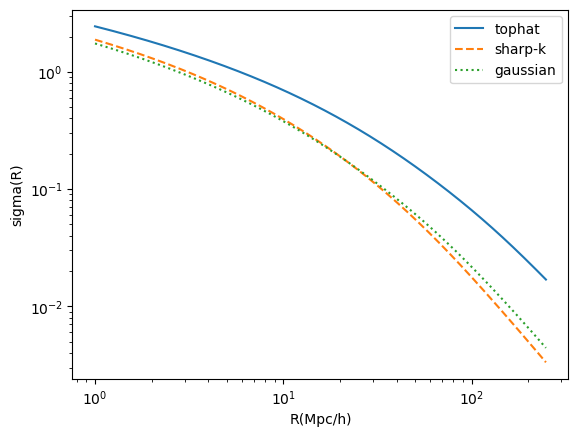

In [3]:
from matplotlib import pyplot as plt
R = 10**np.arange(0,2.4,0.005)
sigma_tophat = cosmo.sigma(R, 0.0)
sigma_sharpk = cosmo.sigma(R, 0.0, filt = 'sharp-k')
sigma_gaussian = cosmo.sigma(R, 0.0, filt = 'gaussian')

plt.figure()
plt.loglog()
plt.xlabel('R(Mpc/h)')
plt.ylabel('sigma(R)')
plt.plot(R, sigma_tophat, '-', label = 'tophat')
plt.plot(R, sigma_sharpk, '--', label = 'sharp-k')
plt.plot(R, sigma_gaussian, ':', label = 'gaussian')
plt.legend()

XiEmulator | 05/26/2025 09:52:38 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/26/2025 09:52:38 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/26/2025 09:52:38 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/26/2025 09:52:38 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/26/2025 09:52:38 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/26/2025 09:52:38 PM

Text(0, 0.5, 'uk')

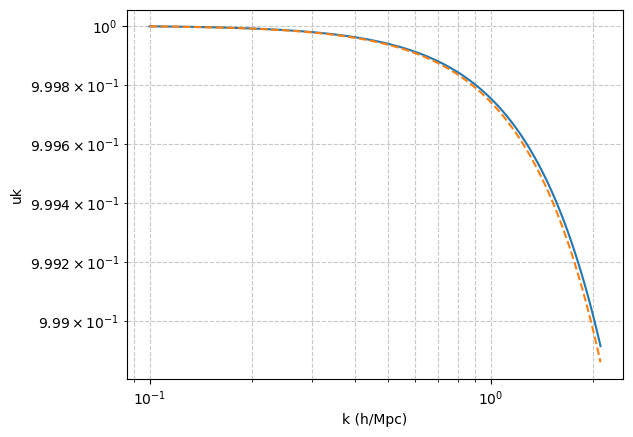

In [10]:
import importlib
from gal_goku import plot_gal
from gal_goku import halo_tools
importlib.reload(plot_gal)
importlib.reload(halo_tools)
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

plt_gal = plot_gal.PlotGal(logging_level='INFO')
k = np.linspace(0.1, 2.1, 100)

cosmo_mid = plt_gal.cosmo_mid
cos_tool = halo_tools.HaloTools(plt_gal.cosmo_mid, z=2.5)
uk = cos_tool.get_uk(k, 1e12)

cosmo_low = np.copy(cosmo_mid)
cosmo_low[0]  = 0.28 # Omega_matter
cos_tool = halo_tools.HaloTools(cosmo_low, z=2.5)
uk_low = cos_tool.get_uk(k, 1e12)


ax.plot(k, uk, label='uk')
ax.plot(k, uk_low, label='uk_low', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(which='both', linestyle='--', alpha=0.7)
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('uk')

XiEmulator | 05/27/2025 10:51:22 AM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/27/2025 10:51:22 AM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/27/2025 10:51:22 AM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/27/2025 10:51:22 AM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/27/2025 10:51:22 AM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/27/2025 10:51:22 AM

/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


Text(0, 0.5, 'uk_logfft')

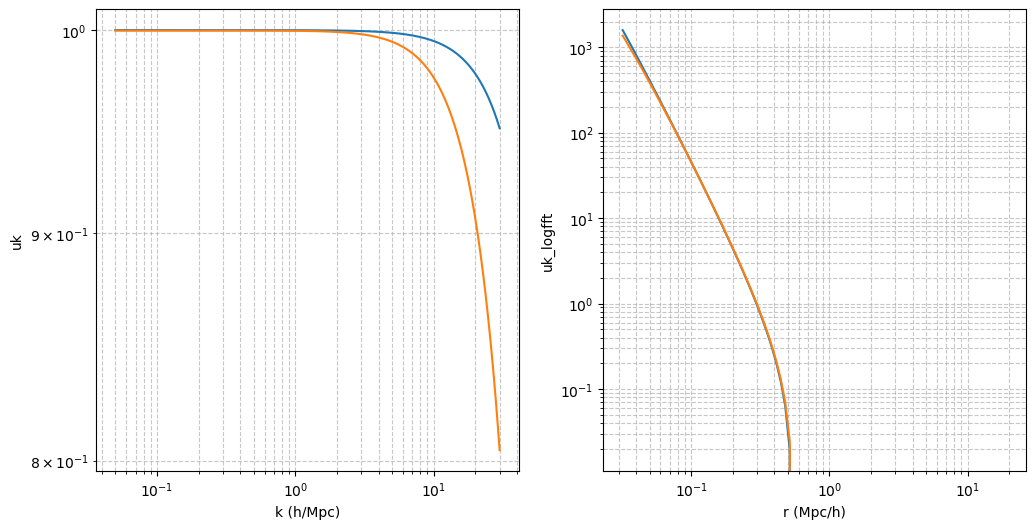

In [19]:
import importlib
from gal_goku import plot_gal
from gal_goku import halo_tools
importlib.reload(plot_gal)
importlib.reload(halo_tools)
import numpy as np
from matplotlib import pyplot as plt
import mcfit

fig, ax = plt.subplots(1,2, figsize=(12, 6))

plt_gal = plot_gal.PlotGal(logging_level='INFO')
k = np.linspace(0.05, 30, 200)

cosmo_mid = plt_gal.cosmo_mid
cos_tool = halo_tools.HaloTools(plt_gal.cosmo_mid, z=2.5)
uk = cos_tool.get_uk(k, np.array([1e11, 1e12]))


for i in range(2):
    ax[0].plot(k, uk[i], label='uk')
    r, uk_logfft = mcfit.P2xi(k, l=0, lowring=True)(uk[i], extrap=True)
    ax[1].plot(r, uk_logfft, label='uk_logfft')
for i in range(2):
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].grid(which='both', linestyle='--', alpha=0.7)
ax[0].set_xlabel('k (h/Mpc)')
ax[0].set_ylabel('uk')
ax[1].set_xlabel('r (Mpc/h)')
ax[1].set_ylabel('uk_logfft')

## Integration  n $P_{gg}(k)$

In [4]:
from gal_goku import gal

config = {'logMh': np.arange(11.1, 12.5, 0.05),
    'smooth_xihh_r': 0,
    'smooth_phh_k': 0,
    'smooth_xihh_mass': 0,
    'r_range': [0.1, 50]}
g = gal.Gal(logging_level='INFO', config=config)
g.reset_hod()

XiEmulator | 05/27/2025 10:39:21 AM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/27/2025 10:39:21 AM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
BaseEmulator | 05/27/2025 10:39:22 AM | INFO  |  Loading the hmf emulator from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/train/hmf_emu_combined_inducing_500_latents_20_leave31.pkl
BaseEmulator | 05/27/2025 10:39:22 AM | INFO  |  Loading the hmf emulator from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/train/hmf_emu_combined_inducing_500_latents_20_leave31.pkl


In [1]:
import importlib
from gal_goku import plot_gal
from gal_goku import halo_tools
importlib.reload(plot_gal)
importlib.reload(halo_tools)
import numpy as np
from matplotlib import pyplot as plt


plt_gal = plot_gal.PlotGal(logging_level='INFO')

plt_gal.g.reset_cosmo(plt_gal.cosmo_mid)

2025-05-27 10:35:39.654382: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 10:35:39.657588: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 10:35:39.667189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748360139.682790   77932 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748360139.687504   77932 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748360139.700173   77932 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

XiEmulator | 05/27/2025 10:35:42 AM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl


2025-05-27 10:35:42.578822: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


BaseEmulator | 05/27/2025 10:35:43 AM | INFO  |  Loading the hmf emulator from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/train/hmf_emu_combined_inducing_500_latents_20_leave31.pkl


/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


check uk:

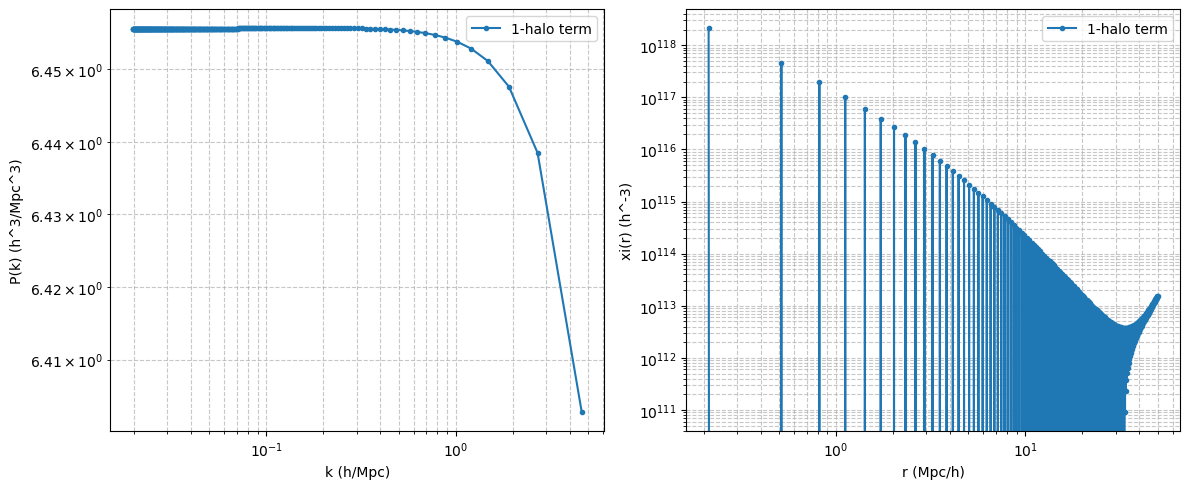

In [3]:
k, p1h = plt_gal.g._pgg_1h()
r, xigg_1h = plt_gal.g._xigg_1h()
fig, ax = plt.subplots(1, 2,figsize=(12, 5))
ax[0].plot(k, p1h, label='1-halo term', marker='o', markersize=3, linestyle='-')
ax[1].plot(r, xigg_1h, label='1-halo term', marker='o', markersize=3, linestyle='-')
for i in range(2):
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].grid(which='both', linestyle='--', alpha=0.7)
    ax[i].set_xlabel('k (h/Mpc)' if i == 0 else 'r (Mpc/h)')
    ax[i].set_ylabel('P(k) (h^3/Mpc^3)' if i == 0 else 'xi(r) (h^-3)')
    ax[i].legend()
fig.tight_layout()

To have a converged Hankle transform of the $P_{gg, 1h}$ ,  i.e. $\xi_{gg, 1h}$, we need a lagrer k-range support : 
`k= np.arange(0.05, 30, 200)` Most importantly the small scale support.

This requires similar support for the two halo terms, to Hankle transform the full $P_{gg}(k)$. So, we do need to do the halo exclusion in our FOF halos.